In [3]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions_allall.csv', index_col=None, dtype={'ZIP CODE': str}, parse_dates=[0])
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-04-28,0:00,BRONX,10454,40.803940,-73.91572,"(40.80394, -73.91572)",NaN,NaN,169 CYPRESS AVENUE,...,Unspecified,NaN,NaN,NaN,3890848,PK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2018-04-28,0:00,BRONX,10455,40.812572,-73.91495,"(40.812572, -73.91495)",NaN,NaN,560 EAST 146 STREET,...,Unspecified,NaN,NaN,NaN,3890830,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,2018-04-28,0:00,NaN,NaN,40.828820,-73.83833,"(40.82882, -73.83833)",BRUCKNER EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3890567,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,2018-04-28,0:00,NaN,NaN,40.861550,-73.92472,"(40.86155, -73.92472)",NAGLE AVENUE,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3890950,PK,PASSENGER VEHICLE,NaN,NaN,NaN
4,2018-04-28,0:00,NaN,NaN,40.746130,-73.83605,"(40.74613, -73.83605)",VAN WYCK EXPWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3890941,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [5]:
# Number of rows
len(df)

1254340

In [133]:
#Rename columns: lower case and replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['date', 'time', 'borough', 'zip_code', 'latitude', 'longitude',
       'location', 'on_street_name', 'cross_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',
       'contributing_factor_vehicle_5', 'unique_key', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5'],
      dtype='object')

In [7]:
dates = df.date
dates.dt.month.head()

0    4
1    4
2    4
3    4
4    4
Name: date, dtype: int64

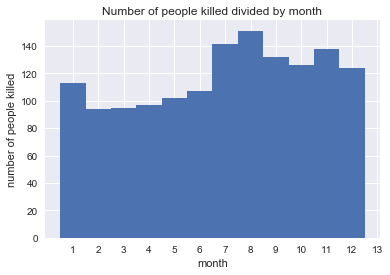

In [8]:
# Number of people killed in each month during all years
# sns.set()
bins = pd.np.arange(1,14)
plt.hist(df.date.dt.month[df.number_of_persons_killed > 0], bins=bins, align='left')
plt.xlabel("month")
plt.ylabel("number of people killed")
plt.xticks(bins)
plt.title("Number of people killed divided by month")

In [9]:
# Check that histogram is correct
# df[(df.date.dt.month == 2) & (df.number_of_persons_killed > 0)]
len(df[(df.date.dt.month == 2) & (df.number_of_persons_killed > 0)])
# Looks correct

94

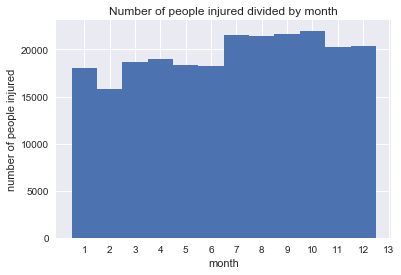

In [10]:
# Number of people injured in each month during all years
# sns.set()
bins = pd.np.arange(1,14)
plt.hist(df.date.dt.month[df.number_of_persons_injured > 0], bins=bins, align='left')
plt.xlabel("month")
plt.ylabel("number of people injured")
plt.xticks(bins)
plt.title("Number of people injured divided by month")

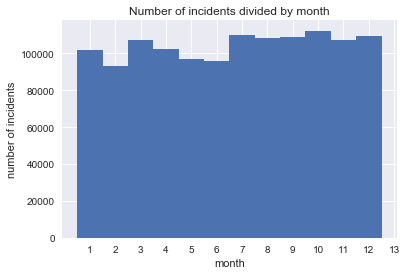

In [11]:
# Any months where accidents are more frequent
bins = pd.np.arange(1,14)
plt.hist(df.date.dt.month, bins=bins, align='left')
plt.xlabel("month")
plt.ylabel("number of incidents")
plt.xticks(bins)
plt.title("Number of incidents divided by month")

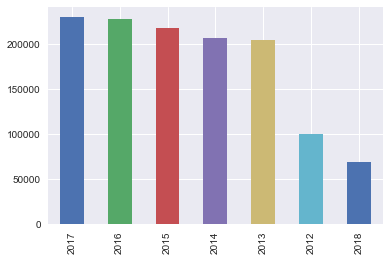

In [12]:
# Any years that were worse than others? 
bins = df.date.dt.year.unique()
df.date.dt.year.value_counts().plot(kind="bar")
# plt.hist(df.date.dt.year, bins=bins, align='left')
# plt.xlabel("month")
# plt.ylabel("number of incidents")
# plt.xticks(bins)
# plt.title("Number of incidents divided by month")

# plt.figure(figsize=(30,10))
# df.zip_code.value_counts().plot(kind='bar')
# plt.xticks(rotation='vertical')

In [13]:
# Date range minimum
df.date.min()

Timestamp('2012-07-01 00:00:00')

In [103]:
# Date range maximum
df.date.max()

Timestamp('2018-04-28 00:00:00')

In [14]:
# Is there a specific hour where accidents are more frequent? Not finished yet
df.time.head()

0    0:00
1    0:00
2    0:00
3    0:00
4    0:00
Name: time, dtype: object

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

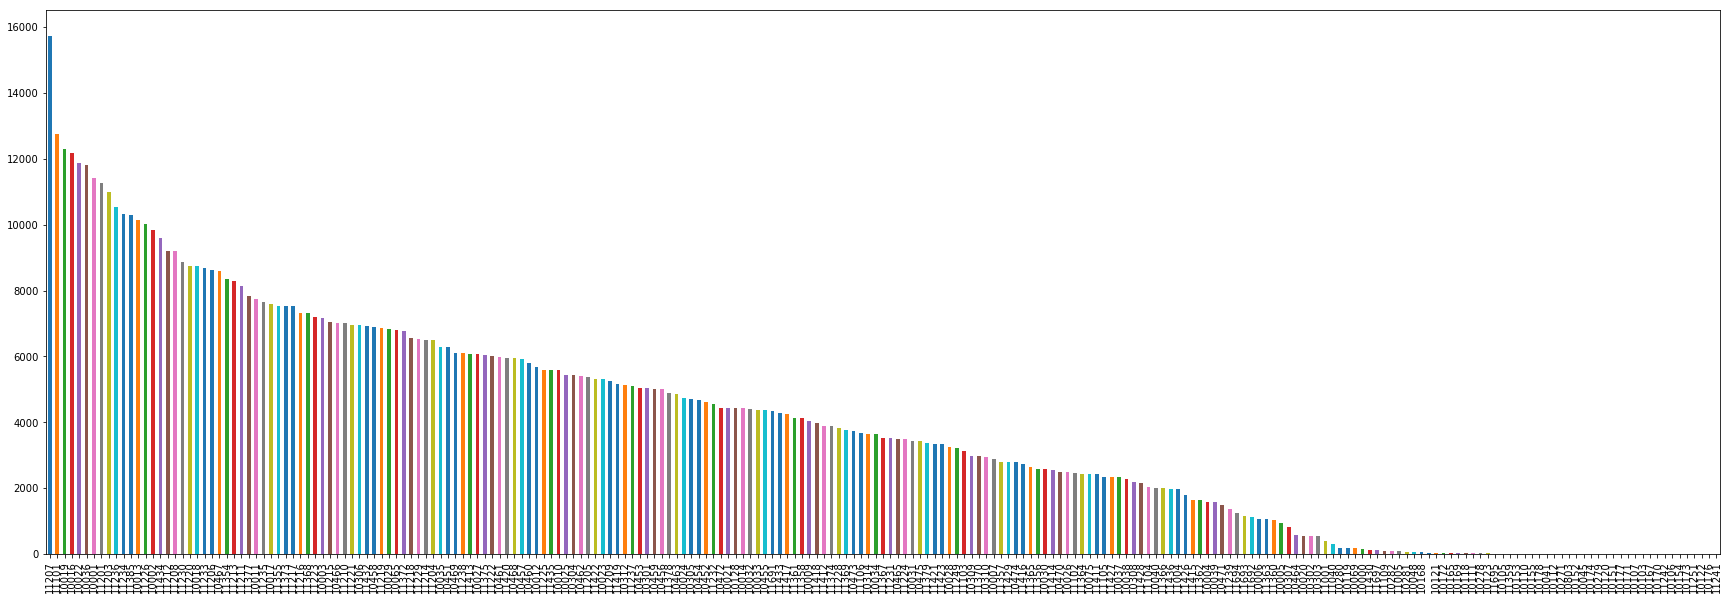

In [111]:
# Is there a specific zip code that has more accidents than others?
plt.figure(figsize=(30,10))
df.zip_code.value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
# Adjust with population size in each zip code --> very hard to find :-(

In [108]:
df.zip_code.value_counts()

11207    15723
11101    12758
10019    12307
10016    12186
10022    11860
10036    11818
10001    11413
11201    11264
11203    10989
11236    10529
11234    10324
11385    10285
10013    10130
11226    10019
10002     9848
11434     9585
11212     9209
11208     9187
11230     8858
11220     8758
10018     8730
11233     8697
11206     8618
10467     8593
11354     8340
11213     8296
11211     8139
11377     7842
10011     7751
11235     7662
         ...  
10105       11
11359       11
10153       10
10110        7
10155        7
10178        6
10041        6
10112        5
10271        4
10803        4
10152        3
10045        3
10174        3
10279        3
10120        3
10151        2
10177        2
10171        2
10107        2
10103        2
10167        2
10170        2
11242        2
10106        2
10154        2
10173        2
11251        1
10122        1
10176        1
11241        1
Name: zip_code, Length: 227, dtype: int64

In [134]:
# Find rows with no location
location = df.location
location.head()

0     (40.80394, -73.91572)
1    (40.812572, -73.91495)
2     (40.82882, -73.83833)
3     (40.86155, -73.92472)
4     (40.74613, -73.83605)
Name: location, dtype: object

In [136]:
# Remove entries without location data
a = len(location)
location = location.dropna()
b = len(location)

#How many rows are removed?
a - b

217639

In [140]:
# New dataframe where rows without location info are removed
dfCleaned = df.dropna(subset=['location'])
dfCleaned.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2018-04-28,0:00,BRONX,10454,40.803940,-73.91572,"(40.80394, -73.91572)",NaN,NaN,169 CYPRESS AVENUE,...,Unspecified,NaN,NaN,NaN,3890848,PK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2018-04-28,0:00,BRONX,10455,40.812572,-73.91495,"(40.812572, -73.91495)",NaN,NaN,560 EAST 146 STREET,...,Unspecified,NaN,NaN,NaN,3890830,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,2018-04-28,0:00,NaN,NaN,40.828820,-73.83833,"(40.82882, -73.83833)",BRUCKNER EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3890567,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,2018-04-28,0:00,NaN,NaN,40.861550,-73.92472,"(40.86155, -73.92472)",NAGLE AVENUE,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3890950,PK,PASSENGER VEHICLE,NaN,NaN,NaN
4,2018-04-28,0:00,NaN,NaN,40.746130,-73.83605,"(40.74613, -73.83605)",VAN WYCK EXPWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3890941,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [141]:
# Length of dataframe without location NANs
len(dfCleaned)

1036701

In [149]:
dfCleaned.date.value_counts().head()

2014-01-21    959
2017-12-15    946
2017-05-19    906
2017-05-18    849
2018-03-02    823
Name: date, dtype: int64

In [143]:
# New dataframe where rows without zip code info are removed
dfCleaned2 = df.dropna(subset=['zip_code'])
c = len(dfCleaned2)
dfCleaned2 = dfCleaned2[dfCleaned2.zip_code != '     ']
d = len(dfCleaned2)
dfCleaned2.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2018-04-28,0:00,BRONX,10454,40.803940,-73.91572,"(40.80394, -73.91572)",NaN,NaN,169 CYPRESS AVENUE,...,Unspecified,NaN,NaN,NaN,3890848,PK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2018-04-28,0:00,BRONX,10455,40.812572,-73.91495,"(40.812572, -73.91495)",NaN,NaN,560 EAST 146 STREET,...,Unspecified,NaN,NaN,NaN,3890830,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
5,2018-04-28,0:00,STATEN ISLAND,10314,40.610172,-74.12146,"(40.610172, -74.12146)",MANOR ROAD,NORTH GANNON AVENUE,NaN,...,NaN,NaN,NaN,NaN,3889602,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
7,2018-04-28,0:05,MANHATTAN,10034,40.866024,-73.92588,"(40.866024, -73.92588)",BROADWAY,CUMMING STREET,NaN,...,Unspecified,NaN,NaN,NaN,3890943,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
8,2018-04-28,0:05,QUEENS,11412,40.694096,-73.75241,"(40.694096, -73.75241)",NaN,NaN,117-21 200 STREET,...,Unspecified,NaN,NaN,NaN,3889522,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [146]:
# Number of rows in dfCleaned2 (no zip code NANs or '     ')
len(dfCleaned2)

894293

In [150]:
# Remove empty string from dfCleaned2
dfCleaned2 = dfCleaned2[dfCleaned2.zip_code != '     ']
len(dfCleaned2)

894293

In [151]:
# Unique zip codes
dfCleaned2.zip_code.unique()

array(['10454', '10455', '10314', '10034', '11412', '11373', '10306',
       '10016', '10459', '11211', '10012', '10014', '11416', '11234',
       '11222', '10457', '10462', '10461', '11209', '11207', '11230',
       '11378', '10458', '11225', '10032', '10451', '11208', '11354',
       '10466', '11205', '11106', '11219', '10021', '10036', '11429',
       '11201', '11203', '11368', '11104', '11432', '10309', '11385',
       '11367', '11420', '10001', '10022', '10452', '11220', '10025',
       '11212', '11214', '11004', '11358', '11419', '11206', '10035',
       '11379', '10312', '11434', '10027', '11228', '11372', '11365',
       '11421', '11426', '11217', '10465', '11428', '11233', '10475',
       '11237', '11370', '11377', '11361', '11218', '11226', '10469',
       '11236', '11040', '11433', '10013', '10010', '11411', '11417',
       '11414', '10308', '11363', '10468', '11413', '11101', '11360',
       '10467', '11249', '11221', '10460', '11356', '11223', '10039',
       '10305', '113

In [152]:
# Number of different zip codes
len(dfCleaned2.zip_code.unique())

226

In [133]:
# Unique values in contributing_factor_vehicle_1
contrFactorOne = df.contributing_factor_vehicle_1
contrFactorOne.unique()

array(['Unspecified', 'Driver Inattention/Distraction',
       'Following Too Closely', 'Unsafe Speed',
       'Traffic Control Disregarded', 'Passing or Lane Usage Improper',
       'Failure to Yield Right-of-Way', 'Unsafe Lane Changing', nan,
       'Backing Unsafely', 'Alcohol Involvement',
       'Reaction to Other Uninvolved Vehicle', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Failure to Keep Right', 'Driver Inexperience',
       'Turning Improperly', 'Illness', 'Other Vehicular',
       'Brakes Defective', 'Aggressive Driving/Road Rage',
       'Outside Car Distraction', 'Obstruction/Debris',
       'Passenger Distraction', 'View Obstructed/Limited',
       'Drugs (Illegal)', 'Pavement Slippery', 'Steering Failure', 'Glare',
       'Tow Hitch Defective', 'Lost Consciousness', 'Fell Asleep',
       'Driverless/Runaway Vehicle', 'Lane Marking Improper/Inadequate',
       'Accelerator Defective', 'Cell Phone (hands-free)',
       'Tr

In [134]:
# Unique values in contributing_factor_vehicle_2
contrFactorTwo = df.contributing_factor_vehicle_2
contrFactorTwo.unique()

array(['Unspecified', 'Driver Inattention/Distraction', nan,
       'Passing or Lane Usage Improper', 'Unsafe Lane Changing',
       'Traffic Control Disregarded', 'Backing Unsafely',
       'Following Too Closely', 'Aggressive Driving/Road Rage',
       'Failure to Yield Right-of-Way', 'Alcohol Involvement',
       'Other Vehicular', 'Unsafe Speed',
       'Reaction to Other Uninvolved Vehicle', 'Turning Improperly',
       'Driver Inexperience', 'Pavement Slippery',
       'View Obstructed/Limited', 'Fatigued/Drowsy', 'Fell Asleep',
       'Lane Marking Improper/Inadequate', 'Oversized Vehicle',
       'Lost Consciousness', 'Failure to Keep Right', 'Obstruction/Debris',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Passenger Distraction', 'Glare', 'Brakes Defective',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Cell Phone (hand-held)',
       'Traffic Control Device Improper/Non-Working', 'Steering Failure',
       'Other Lighting 

In [113]:
# Injured people
injuredPeople = dfCleaned.number_of_persons_injured
injuredPeople.sum()

265834

In [154]:
# Is there a difference between summer and winter? Not finished
dates = pd.to_datetime(dfCleaned.date)
dates.head()

0   2018-04-28
1   2018-04-28
2   2018-04-28
3   2018-04-28
4   2018-04-28
Name: date, dtype: datetime64[ns]

In [115]:
# Killed people
killedPeople = dfCleaned.number_of_persons_killed
killedPeople.sum()

1183

In [117]:
# Injured pedestrians
injuredPedestrians = dfCleaned.number_of_pedestrians_injured
injuredPedestrians.sum()

56641

In [116]:
# Killed pedestrians
killedPedestrians = dfCleaned.number_of_pedestrians_killed
killedPedestrians.sum()

653

In [118]:
# Injured cyclists
injuredCyclists = dfCleaned.number_of_cyclist_injured
injuredCyclists.sum()

21384

In [119]:
# Killed cyclists
killedCyclists = dfCleaned.number_of_cyclist_killed
killedCyclists.sum()

84

In [121]:
# Injured drivers
injuredMotorists = dfCleaned.number_of_motorist_injured
injuredMotorists.sum()

188485

In [122]:
# Killed drivers
killedMotorists = dfCleaned.number_of_motorist_killed
killedMotorists.sum()

449

In [153]:
# Prepare dataframe for export => remove irrelevant columns - entries without zip code already removed
dfExport = dfCleaned2.drop(columns=['time', 'borough', 'latitude', 'longitude', 'location', 'on_street_name', 'cross_street_name', 'off_street_name', 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5', 'unique_key', 'vehicle_type_code_1', 'vehicle_type_code_2', 'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'])
dfExport

,date,zip_code,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,2018-04-28,10454,0,0,0,0,0,0,0,0
1,2018-04-28,10455,0,0,0,0,0,0,0,0
5,2018-04-28,10314,1,0,0,0,0,0,1,0
7,2018-04-28,10034,0,0,0,0,0,0,0,0
8,2018-04-28,11412,0,0,0,0,0,0,0,0
10,2018-04-28,11373,0,0,0,0,0,0,0,0
12,2018-04-28,10306,1,0,0,0,0,0,1,0
14,2018-04-28,10016,0,0,0,0,0,0,0,0
17,2018-04-28,10454,0,0,0,0,0,0,0,0
18,2018-04-28,10459,0,0,0,0,0,0,0,0


In [162]:
# Convert date to yy-mm format
# dfExport['ym'] = dates.dt.strftime("%y-%m")
dfExport['ym'] = dfExport.date.dt.strftime("%y-%m")
dfExport

,date,zip_code,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,ym
0,2018-04-28,10454,0,0,0,0,0,0,0,0,18-04
1,2018-04-28,10455,0,0,0,0,0,0,0,0,18-04
5,2018-04-28,10314,1,0,0,0,0,0,1,0,18-04
7,2018-04-28,10034,0,0,0,0,0,0,0,0,18-04
8,2018-04-28,11412,0,0,0,0,0,0,0,0,18-04
10,2018-04-28,11373,0,0,0,0,0,0,0,0,18-04
12,2018-04-28,10306,1,0,0,0,0,0,1,0,18-04
14,2018-04-28,10016,0,0,0,0,0,0,0,0,18-04
17,2018-04-28,10454,0,0,0,0,0,0,0,0,18-04
18,2018-04-28,10459,0,0,0,0,0,0,0,0,18-04


In [164]:
# Group by both zip code and date and try to include count of combined 
dfExportGrouped = dfExport.groupby(['ym', 'zip_code'], sort=True).sum().reset_index()
dfExportGrouped

,ym,zip_code,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,12-07,10000,2,0,0,0,1,0,1,0
1,12-07,10001,36,0,11,0,6,0,19,0
2,12-07,10002,29,0,10,0,5,0,14,0
3,12-07,10003,32,0,12,0,8,0,12,0
4,12-07,10004,0,0,0,0,0,0,0,0
5,12-07,10005,0,0,0,0,0,0,0,0
6,12-07,10006,0,0,0,0,0,0,0,0
7,12-07,10007,16,0,4,0,4,0,8,0
8,12-07,10009,9,0,3,0,2,0,4,0
9,12-07,10010,18,0,8,0,2,0,8,0


In [157]:
# Number of rows in dfExport
len(dfExportGrouped)

12969

In [177]:
# Count number of combined rows in each group
tmpDf = dfExport.groupby(['ym', 'zip_code'], sort=True).count().reset_index()
count = tmpDf['date']
count

0          2
1        161
2        179
3        139
4         24
5         16
6         11
7         53
8         79
9         83
10       114
11       125
12       202
13        74
14       189
15       113
16       124
17       187
18         8
19        64
20       208
21        86
22        85
23        81
24        26
25        89
26        61
27       103
28        49
29        63
        ... 
12939     62
12940     39
12941    148
12942     29
12943     44
12944     84
12945     45
12946     28
12947     34
12948     55
12949     49
12950     58
12951    103
12952     40
12953     58
12954     42
12955     24
12956     30
12957     20
12958     26
12959      3
12960    109
12961     57
12962    110
12963     77
12964     20
12965     53
12966     18
12967     15
12968     12
Name: date, Length: 12969, dtype: int64

In [176]:
# Add count to dfExportGrouped
dfExportGrouped['incident_count'] = count
dfExportGrouped

,ym,zip_code,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,incident_count
0,12-07,10000,2,0,0,0,1,0,1,0,2
1,12-07,10001,36,0,11,0,6,0,19,0,161
2,12-07,10002,29,0,10,0,5,0,14,0,179
3,12-07,10003,32,0,12,0,8,0,12,0,139
4,12-07,10004,0,0,0,0,0,0,0,0,24
5,12-07,10005,0,0,0,0,0,0,0,0,16
6,12-07,10006,0,0,0,0,0,0,0,0,11
7,12-07,10007,16,0,4,0,4,0,8,0,53
8,12-07,10009,9,0,3,0,2,0,4,0,79
9,12-07,10010,18,0,8,0,2,0,8,0,83


In [205]:
# How many incidents for 12-07
dfExportGrouped[dfExportGrouped.ym=="12-07"].incident_count.sum()

13150

In [178]:
# Check that count sums up to the correct number of rows
dfExportGrouped.incident_count.sum()

894293

In [183]:
# Export dataframe
dfExportGrouped.to_csv(path_or_buf='cleanedCollisionDataGrouped.csv', index=False)

In [127]:
# Order data chronologically
dfExportSorted = dfExport.sort_values(by="date")
dfExportSorted.head()

,date,time,borough,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2
1254339,2012-07-01,9:59,BRONX,10452,40.835397,-73.920305,0,0,0,0,0,0,0,0,Glare,Unspecified
1253976,2012-07-01,15:13,MANHATTAN,10035,40.802562,-73.942992,0,0,0,0,0,0,0,0,Unspecified,Unspecified
1253977,2012-07-01,15:15,QUEENS,11419,40.682171,-73.831036,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified
1253978,2012-07-01,15:20,BROOKLYN,11236,40.634356,-73.910670,0,0,0,0,0,0,0,0,Unspecified,Unspecified
1253979,2012-07-01,15:26,STATEN ISLAND,10312,40.543912,-74.162390,0,0,0,0,0,0,0,0,Prescription Medication,NaN


In [128]:
# Export dataframe
dfExport.to_csv(path_or_buf='cleanedOrderedCollisionData.csv')

In [128]:
# Which vehicle type codes are used?
dfCleaned.vehicle_type_code_1.unique()

array(['PK', 'PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'DS',
       'PICK-UP TRUCK', 'TAXI', 'MOTORCYCLE', 'TR', nan, 'TT', 'TK', 'BU',
       'VN', 'CONV', 'TN', 'BICYCLE', 'GG', 'LL', 'AR', 'HWY C', 'DP',
       'AMBUL', 'AM', 'RV', 'Van', 'FB', 'TRAIL', 'MB', 'GR', 'van', 'VAN',
       'ambul', 'CB', '3D', 'NYC M', 'Light', '994', 'Cat', 'OMR', 'com',
       'FIRET', 'BR', 'nyc a', 'MACK', 'DUMP', 'MS', 'MD', 'Forkl', 'FDNY',
       'USPS', 'bulld', 'DELV', 'PEDICAB', 'BOX T', 'CM', 'MOTOR', 'tow',
       'e-350', 'FOOD', 'SCHOO', 'RF', 'FR', 'TL TR', 'PICKU', 'mopad',
       'TOW T', 'Ambul', 'FORK', 'dump', 'FORKL', 'BUS', 'POWER', 'LF',
       'TRUCK', 'trail', 'elect', 'AMBULANCE', 'PL', 'Marke', 'G Sem',
       'ST', 'CONST', 'DELIV', 'tow t', 'Tract', 'OP', 'MAIL', 'EMS A',
       'unk', 'TRACT', 'Tow', 'sanit', 'deliv', 'ford', 'FIRE TRUCK',
       'ELECT', 'LW', 'SP', 'HIGHL', 'scoot', 'WD', 'COMME', 'COMMM',
       'utili', 'picku', 'p/sh', 'YELLO', 'Trail', 'fi

In [ ]:
# Drop entries that do not have zip code registered
dfZipclean = df.

In [186]:
# Prepare histogram dataset based on dfCleaned2 
# Create a column with hour
dfCleaned3 = dfCleaned2
dfCleaned3

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2018-04-28,0:00,BRONX,10454,40.803940,-73.915720,"(40.80394, -73.91572)",NaN,NaN,169 CYPRESS AVENUE,...,Unspecified,NaN,NaN,NaN,3890848,PK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2018-04-28,0:00,BRONX,10455,40.812572,-73.914950,"(40.812572, -73.91495)",NaN,NaN,560 EAST 146 STREET,...,Unspecified,NaN,NaN,NaN,3890830,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
5,2018-04-28,0:00,STATEN ISLAND,10314,40.610172,-74.121460,"(40.610172, -74.12146)",MANOR ROAD,NORTH GANNON AVENUE,NaN,...,NaN,NaN,NaN,NaN,3889602,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
7,2018-04-28,0:05,MANHATTAN,10034,40.866024,-73.925880,"(40.866024, -73.92588)",BROADWAY,CUMMING STREET,NaN,...,Unspecified,NaN,NaN,NaN,3890943,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
8,2018-04-28,0:05,QUEENS,11412,40.694096,-73.752410,"(40.694096, -73.75241)",NaN,NaN,117-21 200 STREET,...,Unspecified,NaN,NaN,NaN,3889522,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
10,2018-04-28,0:19,QUEENS,11373,40.733887,-73.880875,"(40.733887, -73.880875)",53 AVENUE,HASPEL STREET,NaN,...,Unspecified,NaN,NaN,NaN,3890748,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
12,2018-04-28,0:22,STATEN ISLAND,10306,40.577366,-74.111450,"(40.577366, -74.11145)",SOUTH RAILROAD AVENUE,BANCROFT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3889688,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
14,2018-04-28,0:38,MANHATTAN,10016,40.746033,-73.976800,"(40.746033, -73.9768)",EAST 35 STREET,QUEENS MIDTOWN TUNNEL EXIT,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3888995,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
17,2018-04-28,10:00,BRONX,10454,40.807700,-73.929550,"(40.8077, -73.92955)",BRUCKNER BOULEVARD,LINCOLN AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3890847,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
18,2018-04-28,10:00,BRONX,10459,40.828854,-73.899320,"(40.828854, -73.89932)",EAST 168 STREET,UNION AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3890652,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [188]:
dfCleaned3['hour'] = dfCleaned3.time.str[0:-3]
dfCleaned3

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,hour
0,2018-04-28,0:00,BRONX,10454,40.803940,-73.915720,"(40.80394, -73.91572)",NaN,NaN,169 CYPRESS AVENUE,...,NaN,NaN,NaN,3890848,PK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0
1,2018-04-28,0:00,BRONX,10455,40.812572,-73.914950,"(40.812572, -73.91495)",NaN,NaN,560 EAST 146 STREET,...,NaN,NaN,NaN,3890830,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0
5,2018-04-28,0:00,STATEN ISLAND,10314,40.610172,-74.121460,"(40.610172, -74.12146)",MANOR ROAD,NORTH GANNON AVENUE,NaN,...,NaN,NaN,NaN,3889602,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,0
7,2018-04-28,0:05,MANHATTAN,10034,40.866024,-73.925880,"(40.866024, -73.92588)",BROADWAY,CUMMING STREET,NaN,...,NaN,NaN,NaN,3890943,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0
8,2018-04-28,0:05,QUEENS,11412,40.694096,-73.752410,"(40.694096, -73.75241)",NaN,NaN,117-21 200 STREET,...,NaN,NaN,NaN,3889522,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,0
10,2018-04-28,0:19,QUEENS,11373,40.733887,-73.880875,"(40.733887, -73.880875)",53 AVENUE,HASPEL STREET,NaN,...,NaN,NaN,NaN,3890748,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,0
12,2018-04-28,0:22,STATEN ISLAND,10306,40.577366,-74.111450,"(40.577366, -74.11145)",SOUTH RAILROAD AVENUE,BANCROFT AVENUE,NaN,...,NaN,NaN,NaN,3889688,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0
14,2018-04-28,0:38,MANHATTAN,10016,40.746033,-73.976800,"(40.746033, -73.9768)",EAST 35 STREET,QUEENS MIDTOWN TUNNEL EXIT,NaN,...,NaN,NaN,NaN,3888995,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,0
17,2018-04-28,10:00,BRONX,10454,40.807700,-73.929550,"(40.8077, -73.92955)",BRUCKNER BOULEVARD,LINCOLN AVENUE,NaN,...,NaN,NaN,NaN,3890847,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10
18,2018-04-28,10:00,BRONX,10459,40.828854,-73.899320,"(40.828854, -73.89932)",EAST 168 STREET,UNION AVENUE,NaN,...,NaN,NaN,NaN,3890652,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10


In [190]:
# Prepare dataframe for export => remove irrelevant columns - entries without zip code already removed
dfExport2 = dfCleaned3.drop(columns=['time', 'zip_code', 'borough', 'latitude', 'longitude', 'location', 'on_street_name', 'cross_street_name', 'off_street_name', 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5', 'unique_key', 'vehicle_type_code_1', 'vehicle_type_code_2', 'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'])
dfExport2

,date,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,hour
0,2018-04-28,0,0,0,0,0,0,0,0,0
1,2018-04-28,0,0,0,0,0,0,0,0,0
5,2018-04-28,1,0,0,0,0,0,1,0,0
7,2018-04-28,0,0,0,0,0,0,0,0,0
8,2018-04-28,0,0,0,0,0,0,0,0,0
10,2018-04-28,0,0,0,0,0,0,0,0,0
12,2018-04-28,1,0,0,0,0,0,1,0,0
14,2018-04-28,0,0,0,0,0,0,0,0,0
17,2018-04-28,0,0,0,0,0,0,0,0,10
18,2018-04-28,0,0,0,0,0,0,0,0,10


In [191]:
# Convert date to y-m format
dfExport2['ym'] = dfExport2.date.dt.strftime("%y-%m")
dfExport2

,date,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,hour,ym
0,2018-04-28,0,0,0,0,0,0,0,0,0,18-04
1,2018-04-28,0,0,0,0,0,0,0,0,0,18-04
5,2018-04-28,1,0,0,0,0,0,1,0,0,18-04
7,2018-04-28,0,0,0,0,0,0,0,0,0,18-04
8,2018-04-28,0,0,0,0,0,0,0,0,0,18-04
10,2018-04-28,0,0,0,0,0,0,0,0,0,18-04
12,2018-04-28,1,0,0,0,0,0,1,0,0,18-04
14,2018-04-28,0,0,0,0,0,0,0,0,0,18-04
17,2018-04-28,0,0,0,0,0,0,0,0,10,18-04
18,2018-04-28,0,0,0,0,0,0,0,0,10,18-04


In [192]:
# Group by both date and hour
dfExportGrouped2 = dfExport2.groupby(['ym', 'hour'], sort=True).sum().reset_index()
dfExportGrouped2

,ym,hour,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
0,12-07,0,86,2,12,0,14,0,60,2
1,12-07,1,77,1,10,1,6,0,61,0
2,12-07,10,139,1,36,0,13,0,90,1
3,12-07,11,143,0,38,0,18,0,87,0
4,12-07,12,195,0,50,0,14,0,131,0
5,12-07,13,188,0,31,0,16,0,141,0
6,12-07,14,252,0,37,0,30,0,185,0
7,12-07,15,247,0,48,0,21,0,178,0
8,12-07,16,257,1,61,0,30,0,166,1
9,12-07,17,218,0,44,0,24,0,150,0


In [193]:
# Export dataframe
dfExportGrouped2.to_csv(path_or_buf='histogramData.csv', index=False)

In [194]:
# Number of rows in histogram dataset
len(dfExportGrouped2)

1680